# Investigating the Relationship Between Sensory Symptoms and Migraine Intensity
## MSDS 570 Visual and Unstructured Data Analysis
### Author: Destiny Pounds
### Link to Dataset: https://www.kaggle.com/datasets/ranzeet013/migraine-dataset
### Additional Info: https://codeocean.com/capsule/1269964/tree/v1
---------------------------------------------------------------------------------
Attribute Information:
1) Age: Patient's age
2) Duration: duration of symptoms in last episode in days
3) Frequency: Frequency of episodes per month
4) Location: Unilateral or bilateral pain location (None - 0, Unilateral - 1, Bilateral - 2)
5) Character: Throbbing or constant pain (None - 0, Thobbing - 1, Constant - 2)
6) Intensity: Pain intensity, i.e., mild, medium, or severe (None - 0, Mild - 1, Medium - 2, Severe - 3)
7) Nausea: Nauseous feeling (Not - 0, Yes - 1)
8) Vomit: Vomiting (Not - 0, Yes - 1)
9) Phonophobia: Noise sensitivity (Not - 0, Yes - 1)
10) Photophobia: Light sensitivity (Not - 0, Yes - 1)
11) Visual: Number of reversible visual symptoms
12) Sensory: Number of reversible sensory symptoms
13) Dysphasia: Lack of speech coordination (Not - 0, Yes - 1)
14) Dysarthria: Disarticulated sounds and words (Not - 0, Yes - 1)
15) Vertigo: Dizziness (Not - 0, Yes - 1)
16) Tinnitus: Ringing in the ears (Not - 0, Yes - 1)
17) Hypoacusis: Hearing loss (Not - 0, Yes - 1)
18) Diplopia: Double vision (Not - 0, Yes - 1)
19) Visual defect: Simultaneous frontal eye field and nasal field defect and in both eyes (Not - 0, Yes - 1)
20) Ataxia: Lack of muscle control (Not - 0, Yes - 1)
21) Conscience: Jeopardized conscience (Not - 0, Yes - 1)
22) Paresthesia: Simultaneous bilateral paresthesia (Not - 0, Yes - 1)
23) DPF: Family background (Not - 0, Yes - 1)
24) Type: Diagnosis of migraine type (Basilar-type aura - 0, Familial hemiplegic migraine - 1, Migraine without aura - 2, Other - 3, Sporadic hemiplegic migraine - 4, Typical aura with migraine - 5, Typical aura without migraine - 6)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('migraine.csv')

In [4]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Type']=label_encoder.fit_transform(data['Type'])
labels = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
labels

{'Basilar-type aura': 0,
 'Familial hemiplegic migraine': 1,
 'Migraine without aura': 2,
 'Other': 3,
 'Sporadic hemiplegic migraine': 4,
 'Typical aura with migraine': 5,
 'Typical aura without migraine': 6}

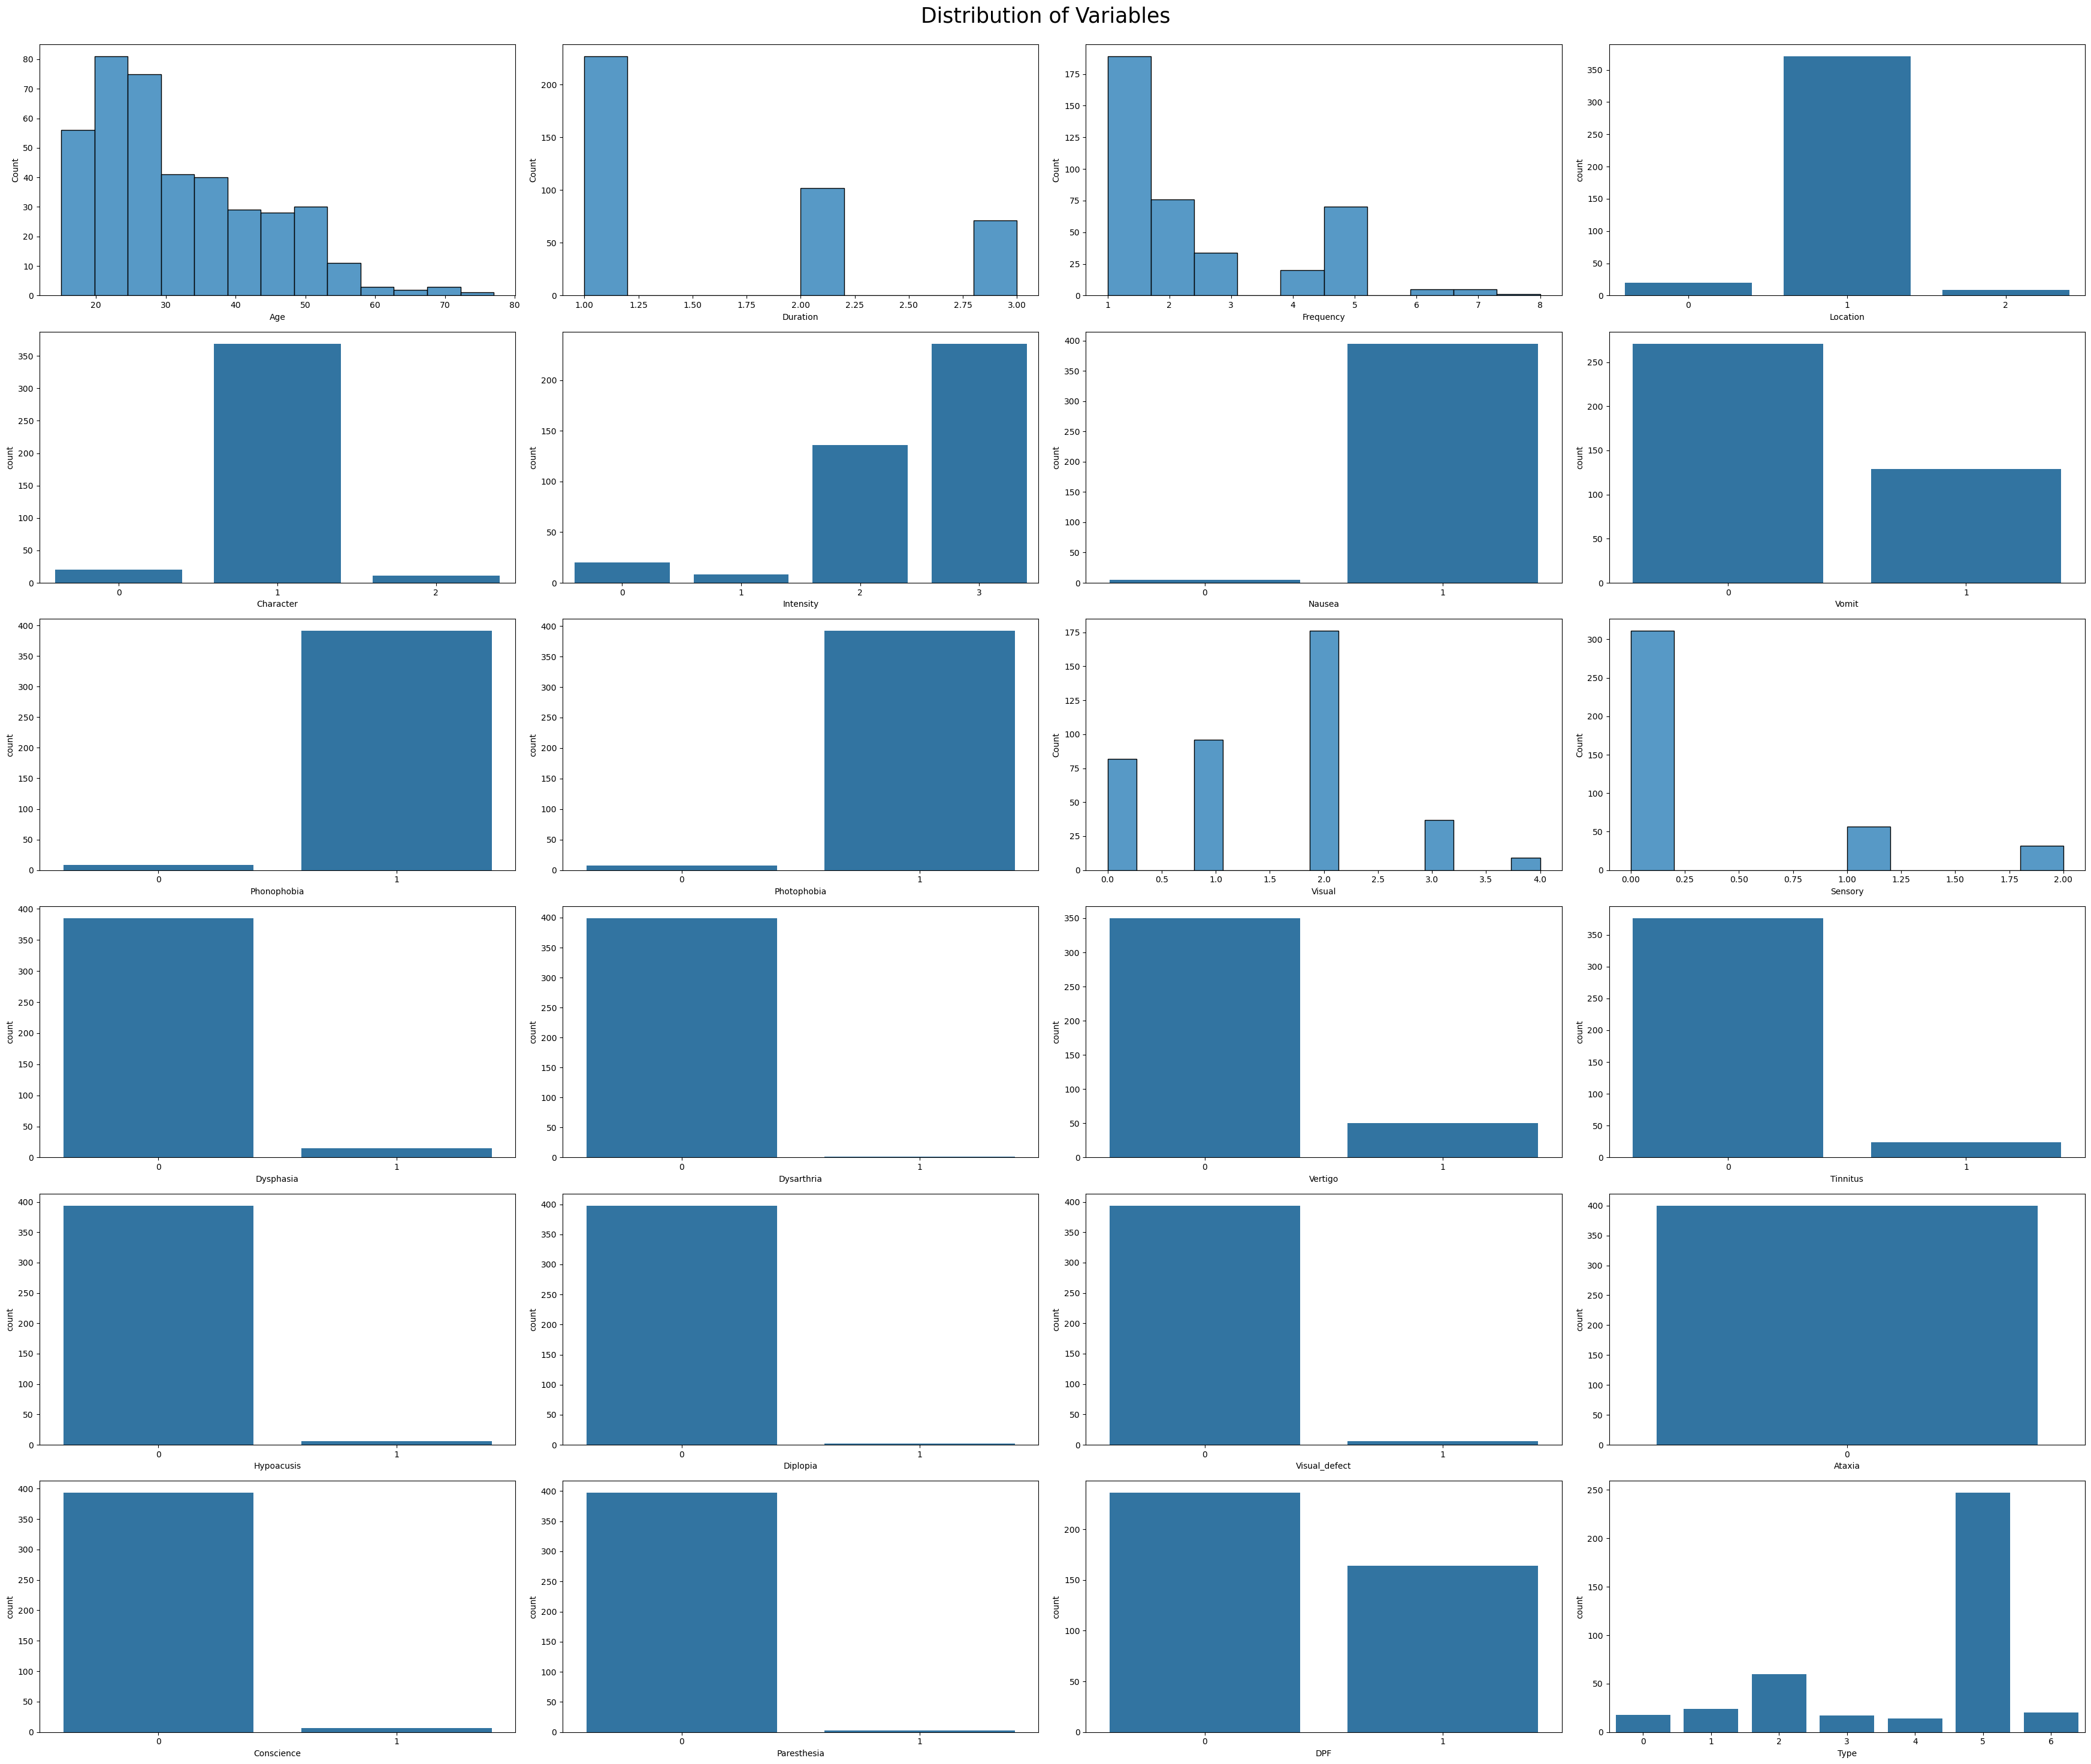

In [5]:
#Distribution of variables 

plt.figure(figsize=(35,30))

plt.subplot(6,4,1)
sns.histplot(x='Age', data=data)

plt.subplot(6,4,2)
sns.histplot(x='Duration', data=data)

plt.subplot(6,4,3)
sns.histplot(x='Frequency', data=data)

plt.subplot(6,4,4)
sns.countplot(x='Location', data=data)

plt.subplot(6,4,5)
sns.countplot(x='Character', data=data)

plt.subplot(6,4,6)
sns.countplot(x='Intensity', data=data)

plt.subplot(6,4,7)
sns.countplot(x='Nausea', data=data)

plt.subplot(6,4,8)
sns.countplot(x='Vomit', data=data)

plt.subplot(6,4,9)
sns.countplot(x='Phonophobia', data=data)

plt.subplot(6,4,10)
sns.countplot(x='Photophobia', data=data)

plt.subplot(6,4,11)
sns.histplot(x='Visual', data=data)

plt.subplot(6,4,12)
sns.histplot(x='Sensory', data=data)

plt.subplot(6,4,13)
sns.countplot(x='Dysphasia', data=data)

plt.subplot(6,4,14)
sns.countplot(x='Dysarthria', data=data)

plt.subplot(6,4,15)
sns.countplot(x='Vertigo', data=data)

plt.subplot(6,4,16)
sns.countplot(x='Tinnitus', data=data)

plt.subplot(6,4,17)
sns.countplot(x='Hypoacusis', data=data)

plt.subplot(6,4,18)
sns.countplot(x='Diplopia', data=data)

plt.subplot(6,4,19)
sns.countplot(x='Visual_defect', data=data)

plt.subplot(6,4,20)
sns.countplot(x='Ataxia', data=data)

plt.subplot(6,4,21)
sns.countplot(x='Conscience', data=data)

plt.subplot(6,4,22)
sns.countplot(x='Paresthesia', data=data)

plt.subplot(6,4,23)
sns.countplot(x='DPF', data=data)

plt.subplot(6,4,24)
sns.countplot(x='Type', data=data)

plt.suptitle("Distribution of Variables", fontsize=25)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()


In [6]:
data['Ataxia'].value_counts()

Ataxia
0    400
Name: count, dtype: int64

In [7]:
#Drop Ataxia
data=data.drop(columns='Ataxia')

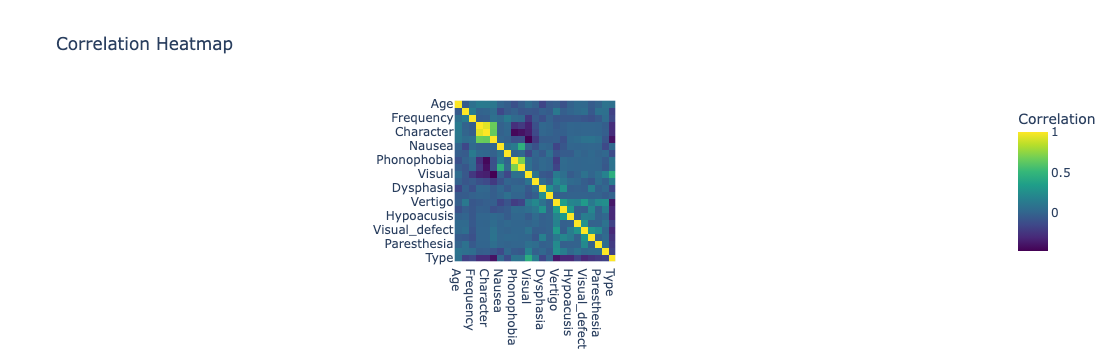

In [8]:
import plotly.express as px

# Compute correlation matrix for numeric columns
correlation_matrix = data.corr()

# Plot heatmap
fig_heatmap = px.imshow(
    correlation_matrix,
    title="Correlation Heatmap",
    labels=dict(color="Correlation"),
    color_continuous_scale="Viridis"
)
fig_heatmap.show()


In [9]:
sensory_columns = ['Dysphasia', 'Dysarthria', 'Vertigo', 'Tinnitus', 'Hypoacusis', 'Diplopia', 'Visual_defect', 'Paresthesia']

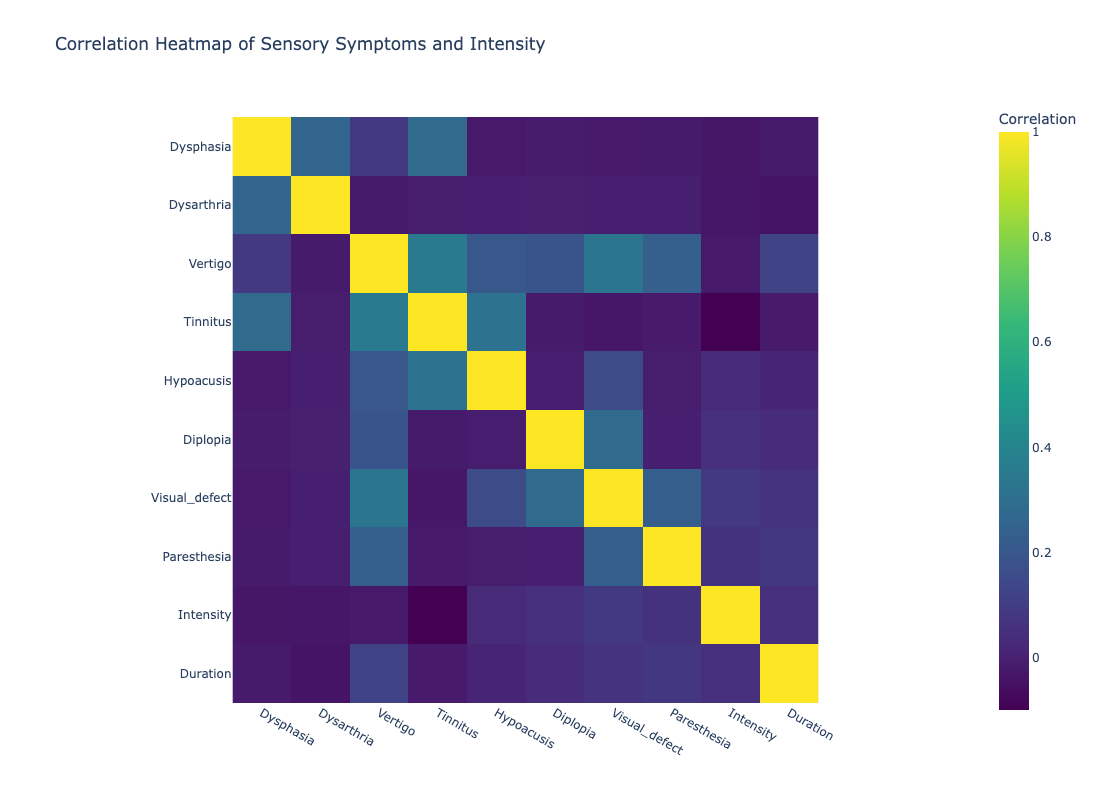

In [42]:
import plotly.express as px

# Compute correlation matrix for sensory-related columns
correlation_matrix = data[sensory_columns + ['Intensity', 'Duration']].corr()

# Plot heatmap
fig_heatmap = px.imshow(
    correlation_matrix,
    title="Correlation Heatmap of Sensory Symptoms and Intensity",
    labels=dict(color="Correlation"),
    color_continuous_scale="Viridis",
    height=800,
    width = 800
)
fig_heatmap.show()


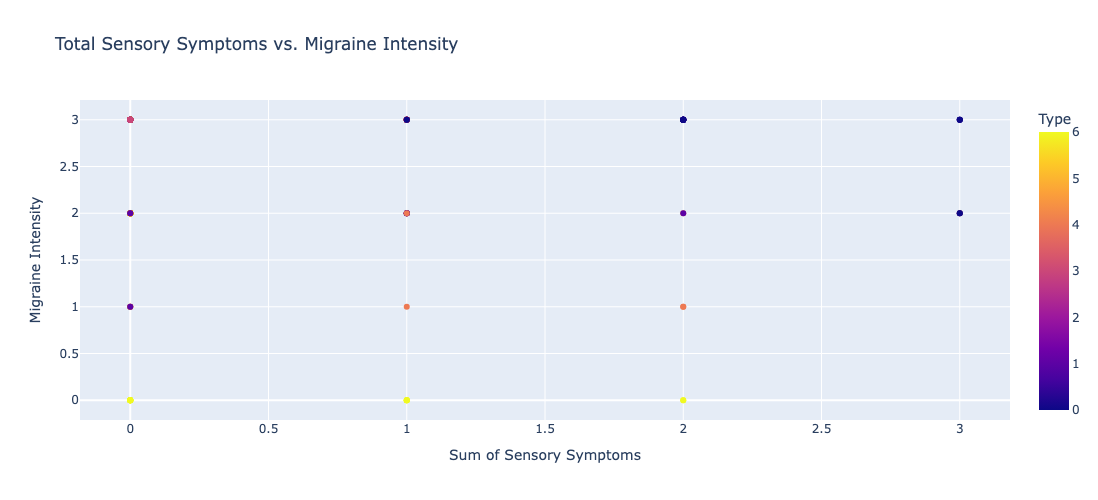

In [46]:
# Create a new column representing the sum of sensory symptoms
data['Total_Sensory_Symptoms'] = data[sensory_columns].sum(axis=1)

# Plot scatter plot
fig_scatter = px.scatter(
    data,
    x='Total_Sensory_Symptoms',
    y='Intensity',
    color='Type',
    title="Total Sensory Symptoms vs. Migraine Intensity",
    labels={'Total_Sensory_Symptoms': 'Sum of Sensory Symptoms', 'Intensity': 'Migraine Intensity'},
    hover_data=sensory_columns + ['Duration'],
    height=500,
    width=800
)
fig_scatter.show()


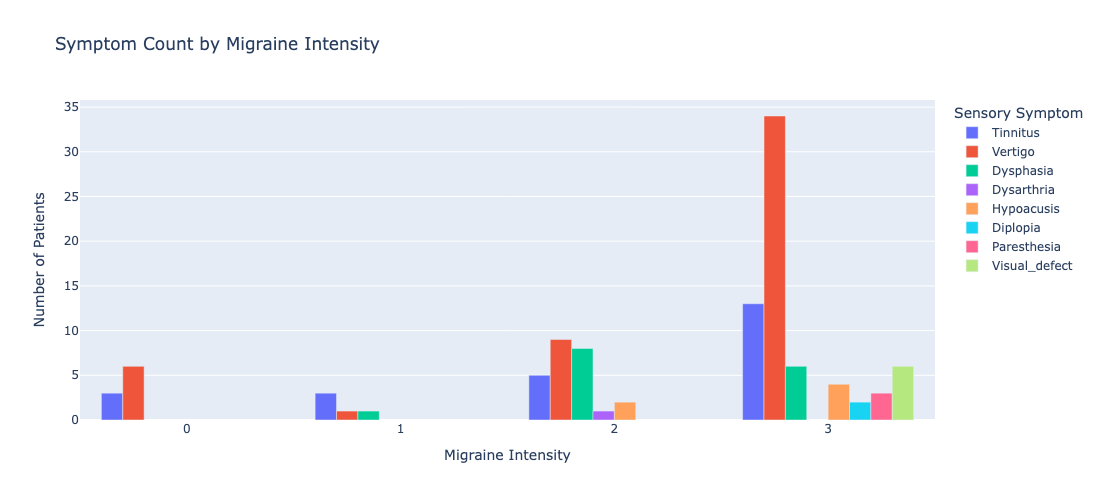

In [50]:
# Prepare data for counting symptom occurrences
melted_data = data.melt(id_vars=['Intensity'], value_vars=sensory_columns, 
                        var_name='Symptom', value_name='Presence')

# Filter for symptom presence (Presence = 1)
symptom_counts = melted_data[melted_data['Presence'] == 1].groupby(['Intensity', 'Symptom']).size().reset_index(name='Count')

# Plot symptom counts as a bar chart
fig_symptom_count = px.bar(
    symptom_counts,
    x='Intensity',
    y='Count',
    color='Symptom',
    title="Symptom Count by Migraine Intensity",
    labels={'Intensity': 'Migraine Intensity', 'Count': 'Number of Patients', 'Symptom': 'Sensory Symptom'},
    barmode='group',
    width=800,
    height = 500
)

fig_symptom_count.show()


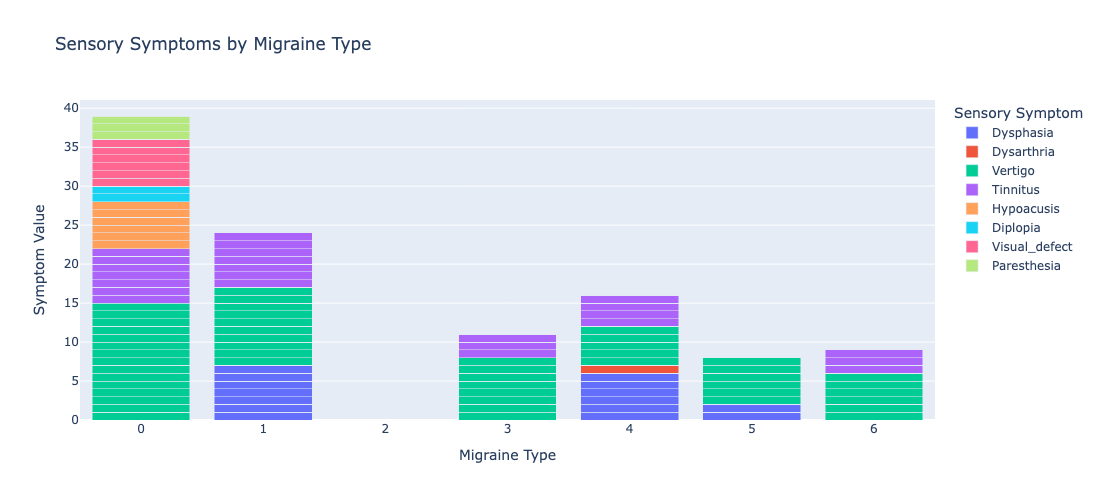

In [54]:
fig_bar = px.bar(
    data.melt(id_vars=['Type'], value_vars=sensory_columns),
    x='Type',
    y='value',
    color='variable',
    title="Sensory Symptoms by Migraine Type",
    labels={'value': 'Symptom Value', 'variable': 'Sensory Symptom', 'Type': 'Migraine Type'},
    barmode='stack',
    height=500,
    width=800
)
fig_bar.show()


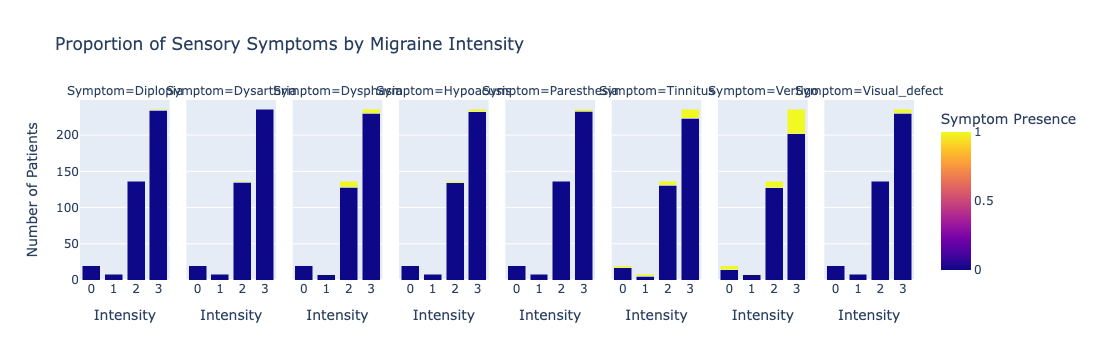

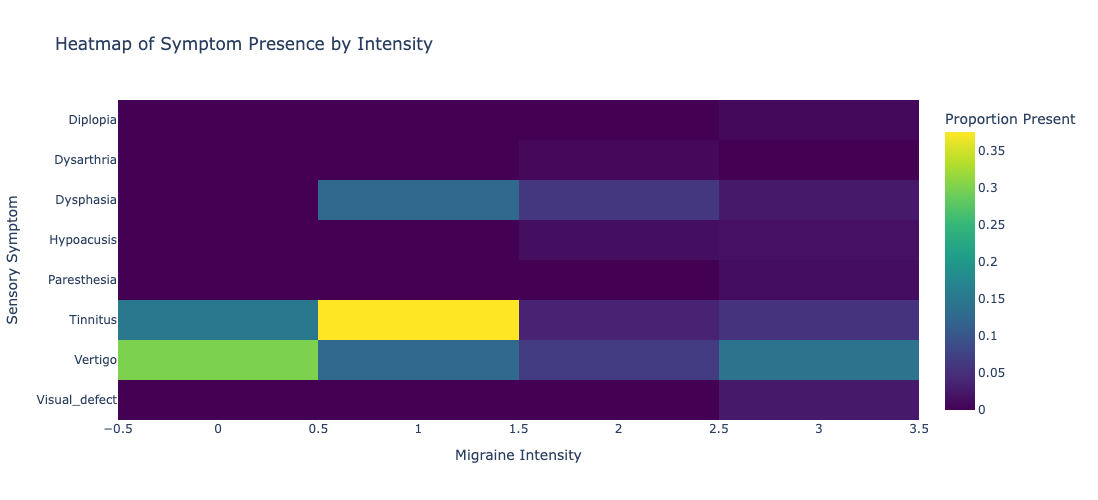

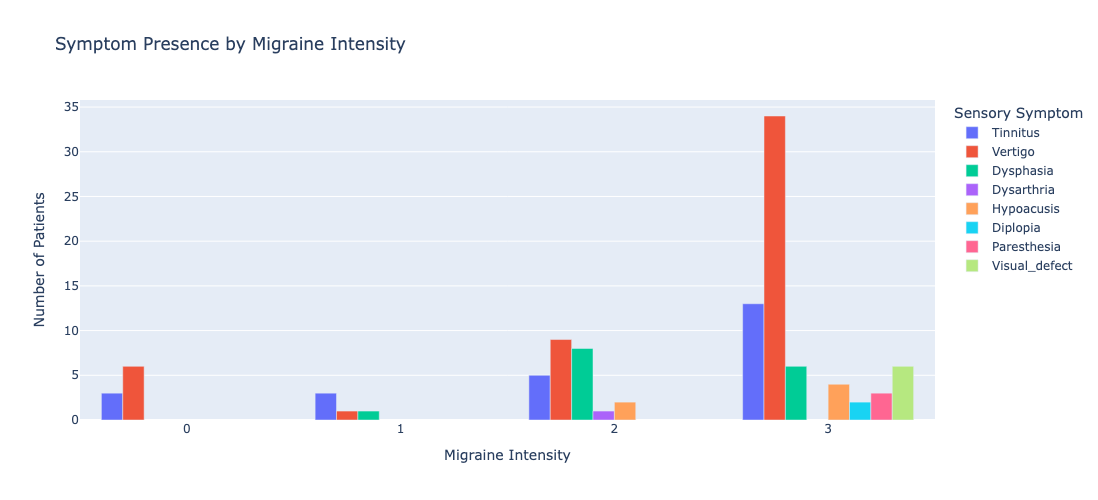

In [70]:
##1. ---Stacked bar chart---
#Prepare data
melted_data = data.melt(id_vars=['Intensity'], value_vars=sensory_columns)
summary = melted_data.groupby(['Intensity', 'variable', 'value']).size().reset_index(name='count')

# Plot
fig_bar2 = px.bar(
    summary,
    x='Intensity',
    y='count',
    color='value',
    facet_col='variable',
    title="Proportion of Sensory Symptoms by Migraine Intensity",
    labels={'count': 'Number of Patients', 'value': 'Symptom Presence', 'variable': 'Symptom'},
    barmode='stack',
    width=1350
)
fig_bar2.show()

## 2. ---Heatmap---
# Prepare data
heatmap_data = melted_data.groupby(['Intensity', 'variable'])['value'].mean().reset_index()
heatmap_pivot = heatmap_data.pivot(index='variable', columns='Intensity', values='value')

# Plot
fig_heatmap2 = px.imshow(
    heatmap_pivot,
    title="Heatmap of Symptom Presence by Intensity",
    labels=dict(x="Migraine Intensity", y="Sensory Symptom", color="Proportion Present"),
    color_continuous_scale="Viridis",
    width=500,
    height=500
)
fig_heatmap2.show()

##3. ---Grouped Bar chart---
# Prepare data
grouped_summary = summary[summary['value'] == 1]  # Filter for symptom presence

# Plot
fig_grouped_bar = px.bar(
    grouped_summary,
    x='Intensity',
    y='count',
    color='variable',
    title="Symptom Presence by Migraine Intensity",
    labels={'count': 'Number of Patients', 'variable': 'Sensory Symptom', 'Intensity': 'Migraine Intensity'},
    barmode='group',
    width=800,
    height=500
)
fig_grouped_bar.show()

/var/folders/b1/g4lcrx5j2855wbt6kxyc4v4h0000gn/T/ipykernel_8794/3744970627.py:16: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



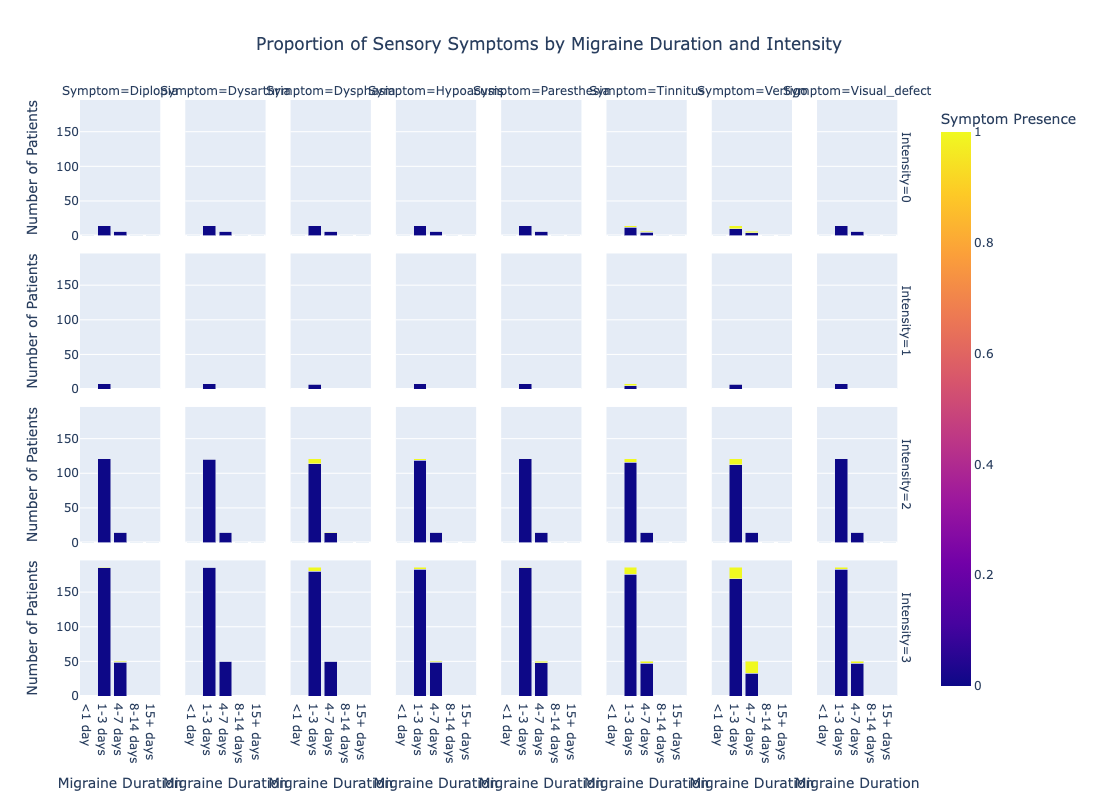

/var/folders/b1/g4lcrx5j2855wbt6kxyc4v4h0000gn/T/ipykernel_8794/3744970627.py:60: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



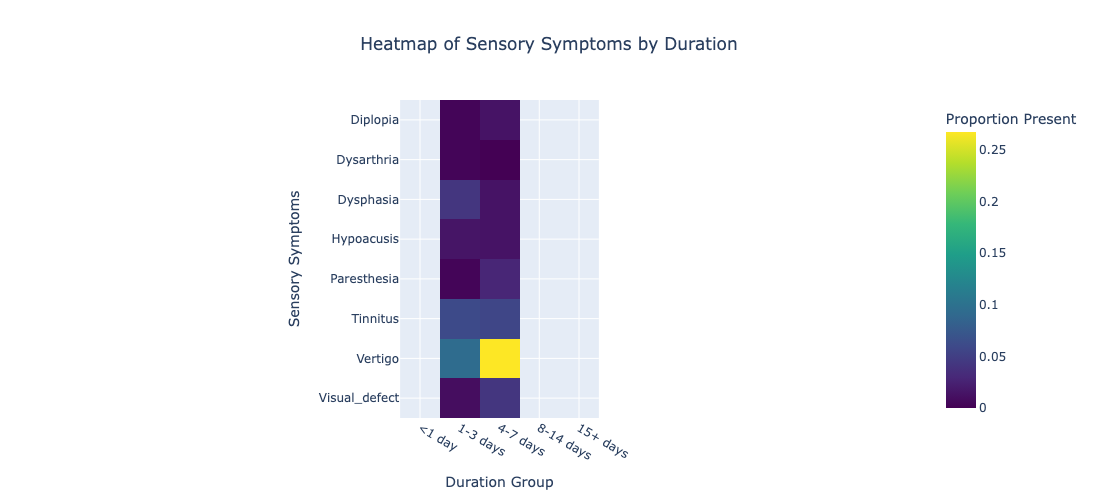

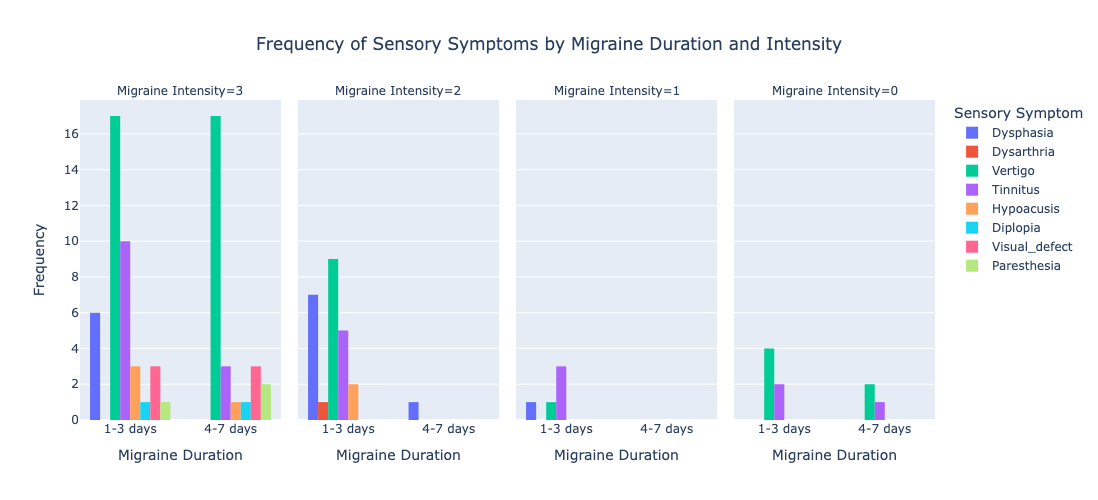

In [84]:
# Add bins for duration
duration_bins = [0, 1, 3, 7, 14, 30]
duration_labels = ['<1 day', '1-3 days', '4-7 days', '8-14 days', '15+ days']
data['Duration Group'] = pd.cut(data['Duration'], bins=duration_bins, labels=duration_labels, right=False)

# Melt the data to create a long-format DataFrame
melted_data = data.melt(
    id_vars=['Intensity', 'Duration Group'],  # Columns to keep
    value_vars=sensory_columns,  # Columns to melt (sensory symptoms)
    var_name='Symptom',  # Rename melted variable column
    value_name='Presence'  # Rename melted value column
)

# Group by Intensity, Duration Group, Symptom, and Presence for analysis
summary = (
    melted_data.groupby(['Intensity', 'Duration Group', 'Symptom', 'Presence'])
    .size()
    .reset_index(name='Count')
)

### --- 1. Stacked Bar Chart ---
fig_bar3 = px.bar(
    summary,
    x='Duration Group',
    y='Count',
    color='Presence',
    facet_col='Symptom',
    facet_row='Intensity',
    facet_col_spacing=0.03,
    title="Proportion of Sensory Symptoms by Migraine Duration and Intensity",
    labels={
        'Count': 'Number of Patients',
        'Presence': 'Symptom Presence',
        'Symptom': 'Symptom',
        'Duration Group': 'Migraine Duration'
    },
    barmode='stack',
    height=800,
    width = 1350
)
fig_bar3.update_layout(
    legend_title="Symptom Presence",
    title_x=0.5
)
fig_bar3.show()

### --- Plot 2: Heatmap of Symptoms by Duration ---
def plot_heatmap(data, title, x_label, y_label):
    fig = px.imshow(
        data,
        title=title,
        labels=dict(x=x_label, y=y_label, color="Proportion Present"),
        color_continuous_scale="Viridis",
         width=500,
        height=500
    )
    fig.update_layout(title_x=0.5)
    return fig
    
heatmap_data = melted_data.groupby(['Duration Group', 'Symptom'])['Presence'].mean().reset_index()
heatmap_pivot = heatmap_data.pivot(index='Symptom', columns='Duration Group', values='Presence')
fig_duration_heatmap = plot_heatmap(
    heatmap_pivot,
    title="Heatmap of Sensory Symptoms by Duration",
    x_label="Duration Group",
    y_label="Sensory Symptoms"
)
fig_duration_heatmap.show()

### --- 3. Facet Grid of Histograms ---
fig_hist = px.histogram(
    melted_data[melted_data['Presence'] == 1],
    x='Duration Group',
    color='Symptom',
    facet_col='Intensity',
    title="Frequency of Sensory Symptoms by Migraine Duration and Intensity",
    labels={
        'Duration Group': 'Migraine Duration',
        'Symptom': 'Sensory Symptom',
        'Intensity': 'Migraine Intensity'
    },
    barmode='group',
    height=500,
    width=800
)
fig_hist.update_layout(
    yaxis_title="Frequency",
    title_x=0.5
)
fig_hist.show()


In [32]:
from dash import Dash, dcc, html
from dash.dependencies import Input, Output

# Initialize Dash app
app = Dash(__name__)

# Layout
app.layout = html.Div([
    html.H1("Migraine Sensory Symptoms Dashboard"),
    dcc.Dropdown(
        id='chart-type',
        options=[
            {'label': 'Correlation Heatmap (Symptom Presence by Intensity', 'value': 'heatmap'},
            {'label': 'Scatter Plot (Total Sensory vs. Intensity)', 'value': 'scatter'},
            {'label': 'Stacked Bar Chart (Sensory by Type)', 'value': 'stacked bar'},
            {'label': 'Group Bar Chart (Sensory by Intensity)', 'value': 'group bar'},
            {'label': 'Heatmap of Symptom Presence by Intensity', 'value': 'heatmap2'},
            {'label': 'Symptom Presence by Migraine Intensity', 'value': 'grouped bar'},
            {'label': 'Sensory Symptoms by Migraine Duration and Intensity', 'value':'bar3'},
            {'label': 'Heatmap of Sensory Symptoms by Duration', 'value':'duration heatmap'},
            {'label': 'Frequency of Sensory Symptoms by Migraine Duration and Intensity', 'value': 'hist'}
            
        ],
        value='heatmap',
        style={'width': '50%'}
    ),
    dcc.Graph(id='main-graph')
])

# Callback to update graph
@app.callback(
    Output('main-graph', 'figure'),
    [Input('chart-type', 'value')]
)
def update_chart(chart_type):
    if chart_type == 'heatmap':
        return fig_heatmap
    elif chart_type == 'scatter':
        return fig_scatter
    elif chart_type == 'stacked bar':
        return fig_bar
    elif chart_type == 'group bar':
        return fig_symptom_count
    elif chart_type == 'heatmap2':
        return fig_heatmap2
    elif chart_type == 'grouped bar':
        return fig_grouped_bar
    elif chart_type == 'bar3':
        return fig_bar3
    elif chart_type == 'duration heatmap':
        return fig_duration_heatmap
    elif chart_type == 'hist':
        return fig_hist

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)